In [12]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import plot,show,hist
from scipy.stats.kde import gaussian_kde
from numpy import linspace,hstack
from pylab import plot,show,hist
#%config InlineBackend.figure_format = 'svg' для большей четкости графиков
matplotlib.style.use('ggplot')
%matplotlib inline

os.chdir(r'C:\Users\Mr Alex\Documents\GitHub\FlightPreparence')
data = pd.read_csv('AmesHousing.txt', sep="\t", header = 0, index_col=False)
town = pd.read_csv('town_1959_2.csv', header = 0, index_col=False)
swiss = pd.read_csv('swiss_bank_notes.csv', header = 0, index_col=False)

In [ ]:
#Число наблюдений(N1), попавших в столбец. H = C*N1 
#H = N1/(N*длина интервала) - в таком случае гистограмма будет вероятностной, то есть в пределах единицы
#Плотность распределения f(x) позволяет рассчитать вероятность P(A) попаданий в определенный интервал
#Математическое ожидание EX - это среднее арифметическое
#В гистограмме наибольший вес имеет площадь столбца
data['SalePrice'].hist(bins=60)

In [ ]:
#Гистограмма нужна чтобы оценить одну группу
#Вероятностная гистограмма 
data['SalePrice'].hist(density=True, bins=60)

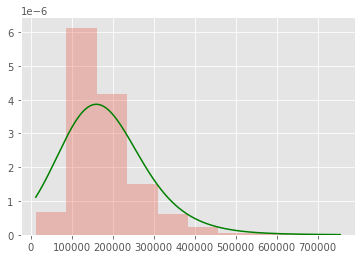

In [11]:
#Ядерная оценка плотности Скотта-Сильвермана - обобщение гистограммы F(t) = (1/n*h)*сумма всех наблюдений K(t-Xi/h)
#Распределение Японечникова определяет плотность К - симметричная, неотрицательная, с интегралом=1
my_density = gaussian_kde(data['SalePrice'], bw_method = 1) #Метод определяет меру сглаживания
x = linspace(min(data['SalePrice']), max(data['SalePrice']),1000)
plot(x, my_density(x),'g') #распределение функции
hist(data['SalePrice'], density=True, alpha=.3) 
show()

In [ ]:
#Для сравнения параметров важно их нормализовать
data.groupby('MS Zoning')['SalePrice'].plot.hist(density=True)
plt.legend()

In [ ]:
#Для сравнения нескольких групп лучше использовать box-plot. Усы - 1,5 межквартиля. Outlies - 3. Extremes - дальше.
#Внимательно смотрим на число наблюдений в каждой из выборок, чтобы проанализировать boxplot
data['MS Zoning'].value_counts()
ax=data.boxplot(column='SalePrice', by='MS Zoning')
ax.get_figure().suptitle('')

<AxesSubplot:>

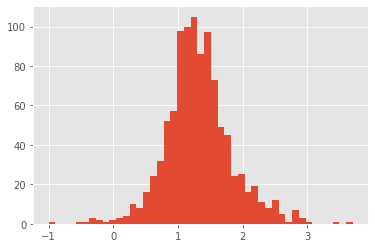

In [3]:
#Для определения "типичного" объекта совокупности можно использовать среднее(если нет выбросов) или медиану(если есть)
#При неравномерном распределении можно убрать выбросы
town_2 = town.iloc[2:1004]
#Или логарифмировать переменную (для лог-нормального распределения)
x = np.log10(town[u'население'])
pd.Series(x).hist(bins=45)
#Усеченное среднее. Выбрасывается 2,5% самых малых и 2,5% наибольших значений переменной. Для остатка считается среднее

In [ ]:
#Два способа анализа отклонения. Выборочная дисперсия D и межквартильный размах(Q3-Q1)

In [ ]:
#Вычисление статистической погрешности для случайной выборки

#Расчет объема выборки
N = 40000 #Генеральная совокупность
P = 0.95 #Доверительный уровень в 95% 
Z = 1.96 #коэффициент доверительного уровня (p = 95%, Z=1,96)(p=99%,   Z=2,58)
p = 0.5 #доля респондентов с  наличием исследуемого признака,
q = (1 - p) #доля респондентов, у которых исследуемый признак отсутствует,
delta = 0.05 #Задаваемая предельная ошибка выборки.
n = (Z**2)*p*q/delta**2 #объем выборки

print("Рекомендуемый объем выборки для данной аудитории:", int(n), "человек")

In [ ]:
#Стратифицированная выборка. Предварительное разделение на страты по определенным признакам
#Кластерная или групповая выборка. Разделение генеральной на однотипные кластеры
#Типы переменных. Количественные(непрерывные, дискретные). Номинальные (несравниваемые). Ранговые (порядковые)
#Гистограмма частот - форма распределения количественного признака
#Описательная статистика. Меры центральной тенденции. Меры изменчивости
#МЦТ. Мода - самый частый признак. Медиана - делит упорядоченное множество пополам. Среднее значение
#МИ. Размах - Xmax-Xmin. Дисперсия D - средний квадрат отклонений индивидуальных значений от средней величины.
#D = сумма(Xинд - Xсред)**2/n-1. Хсред генеральной совокупности обозначается как мю, М
#Стандартное отклонение, "сигма", sd = D**0.5
#Квантили как и медиана делят УМ на равные части. 
#Напр. квартиль - на 4 для Box Plot. Чем шире ящик тем выше вариативность. "Усы" в 1,5 значения "ящика"

In [ ]:
#Нормальное распределение. Унимодально и симметрично 
#Z-Стандартизация: преобразование в тип, где М=0, sd = 1. Правило одной, двух и трех "сигм"
#Z=(Xинд-М)/sd Пример: по таблице Z, где Хсред=150, sd=8, превышать Xинд будет 0.5z или 30% 
#Центральная предельная теорема. Для выборок стандартная ошибка среднего se=SDинд/n**0.5, где n - число элементов выборки
#Если n выборка репрезентативная и число элементов > 30, то se=0.5
#Интервал для поиска М генеральной совокупности(доверительный интервал): для 95% выборок Хсред ± 1.96*se включат в себя М
#Статистическая проверка гипотез. Z=(Xсред-M)/se =(18,5-20)/0.5 = -3. Вероятность получить такой результат 0.0027
#P-уровень значимости. Если p>0.05, то нет оснований отклонять данную гипотезу#

In [ ]:
#Распределение Стьюдента (t-distribution) для n<30 - более высокие хвосты распределений.Число степеней свободы df=n-1
#t заменяет Z в распределении Стьюдента. t=(Xинд-M)/(sd/n**0.5)
#Парный t-тест или критерий t-Стьюдента.  X1сред - Х2сред = А , se=((sd1**2/n1)+(sd2**2/n2))**0.5 , df=n1+n2-2
#При t = A/se и df можно рассчитать p при котором M1-M2=0
#Q-Q Plot показывает насколько выборочные значения соответствуют предсказанным(из нормального распределеня)
#Тесты Колмогорова-Смирнова и Shapiro-Wilk позволяют проверить выборку на принадлежность ГС и нормальность распредеелния
#Непараметрический аналог: U-критерий Манна-Витни переводит значения в ранговую шкалу

In [ ]:
#Дисперсионный анализ. Если межгрупповой показатель изменчивости сильно превышает внутригрупповой, то средние разнятся
#SST - общая сумма квадратов показывает общую изменчивость данных. Сумма(Xинд-Xсред)**2  SST = SSW+SSB
#SSW - сумма квадратов внутригрупповая. Сумма(X1инд-Х1сред)**2 + ...(XNинд-ХNсред)**2
#SSB - сумма квадратов межгрупповая. SSB= n(X1сред - Хсред)**2 + ...n(XNсред-Хсред)**2
#Распределение Фишера, F-значение. F=(ssb/n-1)/(ssw/N-n). При верности нулевой гипотезы значения F очень маленькие
#Поправка Бонферрони на множественную проверку гипотез. a = ai/n  НО: мешает получить значимые уровни различия
#FDR или критерий Тьюки считает p-уровень для сравниваемых пар Xтэ=Xa-Xб
#Двухакторный дисперсионный анализ SStotal=SSW+SSBa +SSBb + SSBa*SSBb
#Взаимодействие факторов в ANOVA
#Дисперсионный анализ требует нормальности распределения зависимой переменной и гомогенности дисперсии(тест Левена)

In [ ]:
#Корреляция. Scatter-plot или диагратта рассеивания
#Сила и направление взаимосвязи определяется ковариацией. cov=Сумма((Xi-Xсред)*(Yi-Yсред))/N-1
#Коэффициент корреляции Пирсона находится в промежутке [-1; 1] и считается как Rxy=cov/SDx*SDy
#Коэффициент детерминации r**2 показывает влияние дисперсии одной переменной на другую в промежутке [0; 1]
#Коэффициент Спирмена позволяет блокировать выбросы через ранги. d=X-Y. Rs=1-6*сумма d**2/N(N**2-1)
#Иногда корреляция обусловлена третьей переменной

In [ ]:
#Регрессионнный анализ позволяет исследовать взаимосвязи переменных и делать линию тренда
#Простая линейная регрессия. Взаимосвязь 2-х переменных. Y-зависимая, X-независимая 
#Y=B0(intercept)+B1(slope). Зачение Y, где линия пересекает ось, угол наклона линии к оси X
#Метод наименьших квадратов(МНК) находит оптимальные параметры B0 и B1, чтобы сумма квадратов остатков (SS) была минимальна
#Y=B0+B1*X1
#B1 = SDy/SDx*Rxy, B0 = (Yсред-B1*Xсред), t = B1/se, df=N-2 Если B1 близка к нулю, то взаимосвязи почти нет
#Коэффтцтент детерминации R**2 = 1-(SSres/SStotal) доля дисперсии Y, объясняемая регрессионной моделью. Чем больше R , тем лучше
#Требования: линейная вхаимосвязь X Y, нормальное распределение остатков, гомоскедатичность(изменчивость) остатков

In [ ]:
#Множественная регрессия  Y= B0+B1*X1 + ... + BN*XN   Многомерный scatter-plot
#Дополнительно требует: мультиколлинеарность(без сильной корреляции или идентичности), нормальное распределение переменных.
#t-критерий показывает оказываемое влияние каждого предиктора. Если 0, то влияния нет
#Для множественной регрессии используется "Исправленный" R**2

In [ ]:
#Классификация 
#Логистическая регрессия позволяет исседовать взаимосвязи для зависимой переменной с двумя значениями (0,1)
#Кластерный (иерархический) анализ - поиск и группировка объектов по определенным признакам и сведение в Tree

In [ ]:
#Расчет ошибки выбоки для доли признака
#Случай 1. Генеральная совокупность значительно больше выборки
n = 384 #Объем выборки
m = 276 #Число объектов выборки с нужными параметрами (True)
p = m/n #Вероятность на основе практических данных
sigma = n/2*((p*(1-p)/n*(1-n/N)))**0.5 
print('Результат выборки один составит: ', \
      float("{0:.1f}".format(p*100)), "±", float("{0:.1f}".format(sigma)), "%")

#Случай 2. Генеральная совокупность сопоставима с объемом выборки
N = 2500
delta = Z*((p*q/n)*((N-n)/(N-1)))**0.5 
print("Точность результатов выборки два составит: ", "±", float("{0:.1f}".format(delta*100)), "%")

In [ ]:
#Рассчет доверительного интервала
P = 0.99 #Доверительный уровень в 99% 
Z = 2.58 #коэффициент доверительного уровня 
p = 0.2 #доля респондентов с наличием исследуемого признака,
q = (1 - p) #доля респондентов, у которых исследуемый признак отсутствует,
n = 1000 #Объем выборки

sigma = Z*(p*q/n)**0.5 #Погрешность оценки

print('Точность результатов конкретной выборки составит: ±', float("{0:.2f}".format(sigma*100)), "%")
print('Доверительный интервал составит:', float("{0:.2f}".format((p - sigma)*100)), "% ;", \
                                            float("{0:.2f}".format((p + sigma)*100)), "%")

In [ ]:
#Ненормальные распределения
#Сгладить распределение, уменьшив шкалу на основании полезности данных, удалив аномалии
#Логарифмировать переменные (не забываем про ноль в исходной переменной). Схлопывает экстремальные значения
#Логарифмирование отлично работает с ассиметричными распределениями
#Если логарифмы переменных зависимы линейно, то значит сами переменные зависят нелинейно 
#Применить непараметрический критерий (ранговое распределение)
#Преобразование Бокса-Кокса подбирает оптимальную степень для возведения в нее mathworks.com/help/finance/boxcox.html 
#Bootstrap и метод Монте-Карло. Сравнивать медиану, мин, макс, 13-процентиль, среднее

In [ ]:
#Retention/Churn